<a href="https://colab.research.google.com/github/Ghazaleh99/k-nearest-neighbor/blob/main/k_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing K-Nearest Neighbors from Scratch in Python
## Machine Learning course


---

**Ghazaleh**

##Step 1 - Import the libraries

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

##Step 2 - Setting up the Data

In [ ]:
number_of_features = 8 
h = ['AGE', 'ON THYROXINE', 'TSH MEASURED', 'TSH', 'T3', 'TT4 MEASURED', 'TT4', 'class']
df = pd.read_csv('Thyroid.txt', sep = ',', names = h)

In [ ]:
df.head()

,AGE,ON THYROXINE,TSH MEASURED,TSH,T3,TT4 MEASURED,TT4,class
0,60,0,1,26.0,2.0000,1,69.0,1
1,67,0,1,0.8,2.3000,1,104.0,0
2,18,1,1,478.0,2.0135,1,45.0,2
3,36,0,1,8.6,3.7000,1,131.0,1
4,28,0,1,139.0,0.9000,1,36.0,2


## Step 3 - Train 

### Euclidean Distance
Calculate the Euclidean distance between two vectors

In [ ]:
def euclidean(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [ ]:
# euclidean(dataset[0][:-1],dataset[1][:-1])

### Feature scaling
Applying normalization:

In [ ]:
def normalization(df):
  for column in df.columns[:-1]:
    df[column] = (df[column]-min(df[column])) / (max(df[column])-min(df[column]))
  return df

In [ ]:
# print(normalization(df))

Locate the most similar neighbors

In [ ]:
def get_neighbors(train, test_row, num_neighbors):
  distances = []
  for train_row in train:
    dist = euclidean(test_row, train_row)
    distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1])
  # print(distances)
  # print(len(distances))
  neighbors = []
  for i in range(num_neighbors):
    neighbors.append(distances[i][0])
  return neighbors

In [ ]:
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [ ]:
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = []
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return predictions

In [ ]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [ ]:
def evaluate_algorithm(dataset, n_folds, num_neighbors):
	# folds = cross_validation_split(dataset, n_folds)
  folds = np.split(dataset, n_folds)
  scores = []
  for i in range(n_folds):
    print(f'________________________{i} fold__________________________________')
    test_set = folds[i]
    tmp = np.delete(folds, i, 0)
    tmp1 = tmp[0]
    for j in range(1, tmp.shape[0]):
      tmp1 = np.append(tmp1, tmp[j], axis=0)
      train_set = tmp1
    predictions = k_nearest_neighbors(train_set, test_set, num_neighbors)
    accuracy = accuracy_metric(list(test_set[:, -1]), predictions)
    scores.append(accuracy)
    print('accuracy: %s' % accuracy)
  return scores

In [ ]:
def not_normal(df, n_folds):
  dataset = df.to_numpy()
  result = []
  # not normalized
  for i in range(1,11):
    print('k =', i)
    num_neighbors = i
    scores = evaluate_algorithm(dataset, n_folds, num_neighbors)
    avg = sum(scores)/float(len(scores))
    result.append(avg)
    print('Mean Accuracy: %.3f%%' % avg)
  return result

In [ ]:
def plot_k(accuracy):
  k = [1,2,3,4,5,6,7,8,9,10]
  xpoints = np.array(k)
  ypoints = np.array(accuracy)
  plt.plot(xpoints, ypoints)
  plt.show()

k = 1
________________________0 fold__________________________________
accuracy: 60.0
________________________1 fold__________________________________
accuracy: 85.0
________________________2 fold__________________________________
accuracy: 65.0
________________________3 fold__________________________________
accuracy: 70.0
________________________4 fold__________________________________
accuracy: 70.0
Mean Accuracy: 70.000%
k = 2
________________________0 fold__________________________________
accuracy: 75.0
________________________1 fold__________________________________
accuracy: 65.0
________________________2 fold__________________________________
accuracy: 60.0
________________________3 fold__________________________________
accuracy: 70.0
________________________4 fold__________________________________
accuracy: 80.0
Mean Accuracy: 70.000%
k = 3
________________________0 fold__________________________________
accuracy: 70.0
________________________1 fold__________________________

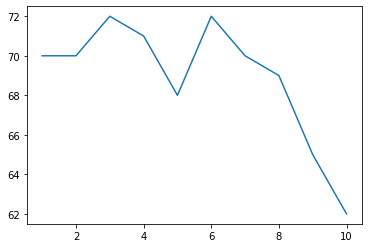

In [ ]:
n_folds = 5
accuracy = not_normal(df.copy(), n_folds)
plot_k(accuracy)

In [ ]:
# normalized
def normal(df, n_folds):
  df_n = normalization(df.copy())
  dataset_n = df_n.to_numpy()
  n_folds = 5
  result_normal = []
  # not normalized
  for i in range(1,11):
    print('k =', i)
    num_neighbors = i
    scores = evaluate_algorithm(dataset_n, n_folds, num_neighbors)
    avg = sum(scores)/float(len(scores))
    result_normal.append(avg)
    print('Mean Accuracy: %.3f%%' % avg)
  return result_normal

k = 1
________________________0 fold__________________________________
accuracy: 100.0
________________________1 fold__________________________________
accuracy: 100.0
________________________2 fold__________________________________
accuracy: 100.0
________________________3 fold__________________________________
accuracy: 100.0
________________________4 fold__________________________________
accuracy: 100.0
Mean Accuracy: 100.000%
k = 2
________________________0 fold__________________________________
accuracy: 100.0
________________________1 fold__________________________________
accuracy: 100.0
________________________2 fold__________________________________
accuracy: 95.0
________________________3 fold__________________________________
accuracy: 95.0
________________________4 fold__________________________________
accuracy: 100.0
Mean Accuracy: 98.000%
k = 3
________________________0 fold__________________________________
accuracy: 100.0
________________________1 fold________________

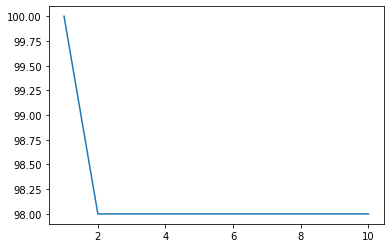

In [ ]:
accuracyn = normal(df.copy(), n_folds)
plot_k(accuracyn)